# Создание набора данных из файлов на локальном диске

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pathlib
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
np.set_printoptions(precision=3)

### Сгенерируем список файлов с изображениями

In [3]:
imgdir_path = pathlib.Path('../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
file_list

['../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/cat-01.jpg',
 '../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/cat-02.jpg',
 '../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/cat-03.jpg',
 '../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/dog-01.jpg',
 '../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/dog-02.jpg',
 '../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/dog-03.jpg']

## Визуализируем примеры изображений

Форма изображения:  (900, 1200, 3)
Форма изображения:  (900, 1200, 3)
Форма изображения:  (900, 742, 3)
Форма изображения:  (800, 1200, 3)
Форма изображения:  (800, 1200, 3)
Форма изображения:  (900, 1200, 3)


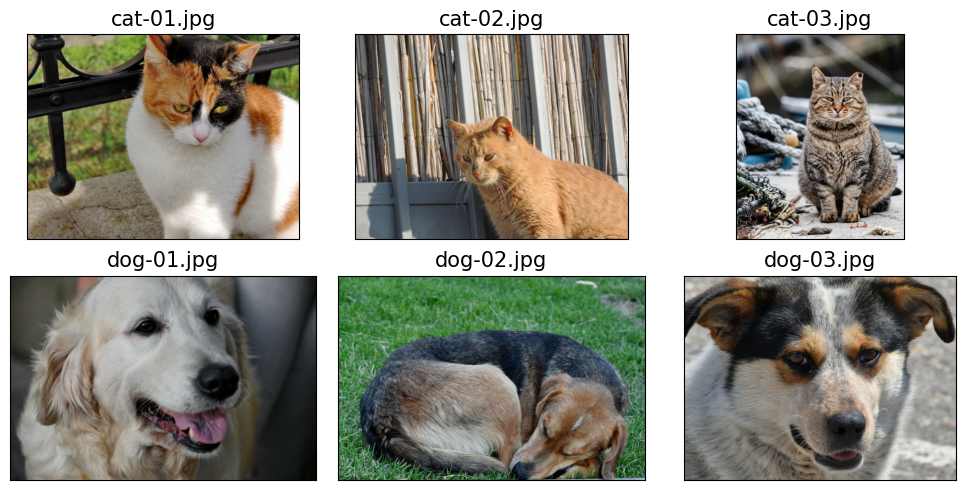

In [6]:
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Форма изображения: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()    

## Извлечение меток для изображений из списка имен файлов, назначач метку 1 изображениям собак, а метку 0 изображениям котов

In [7]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


## Создание общего набора данных

In [8]:
ds_files_labels = tf.data.Dataset.from_tensor_slices(
    (file_list, labels)
)
for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/cat-01.jpg' 0
b'../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/cat-02.jpg' 0
b'../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/cat-03.jpg' 0
b'../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/dog-01.jpg' 1
b'../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/dog-02.jpg' 1
b'../repositories/python-machine-learning-book-3rd-edition/ch13/cat_dog_images/dog-03.jpg' 1


## Трансформации набора данных

Набор данных содержит имена файлов и метки. Далее надо применить к набору данных следующие трансформации:
- загрузитьсодержимое изображения и его файла;
- декодировать низкоуровневое содержимое и изменить размеры до желаемых (80 x 120);

In [9]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image, label

In [10]:
img_width, img_height = 120, 80
ds_images_labels = ds_files_labels.map(load_and_preprocess)

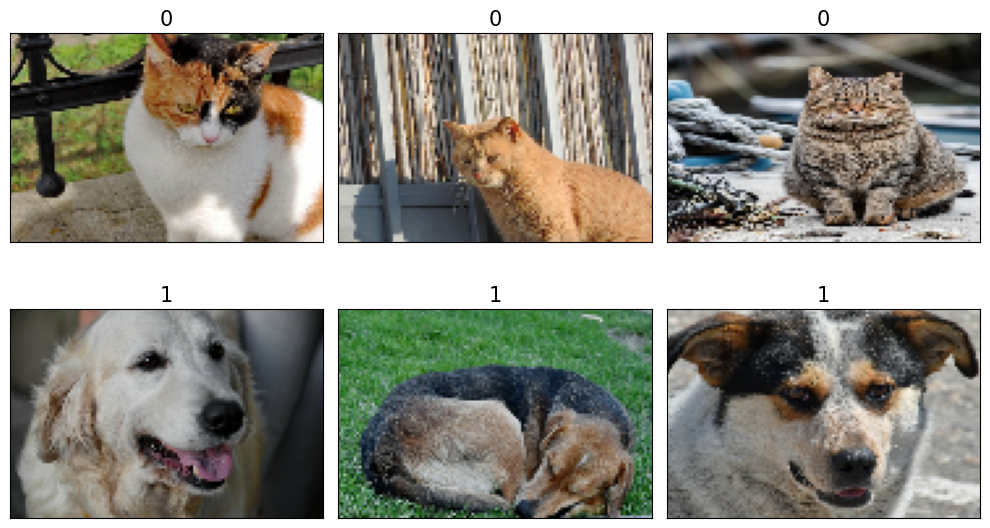

In [13]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(ds_images_labels):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), size=15)
plt.tight_layout()
plt.show() 